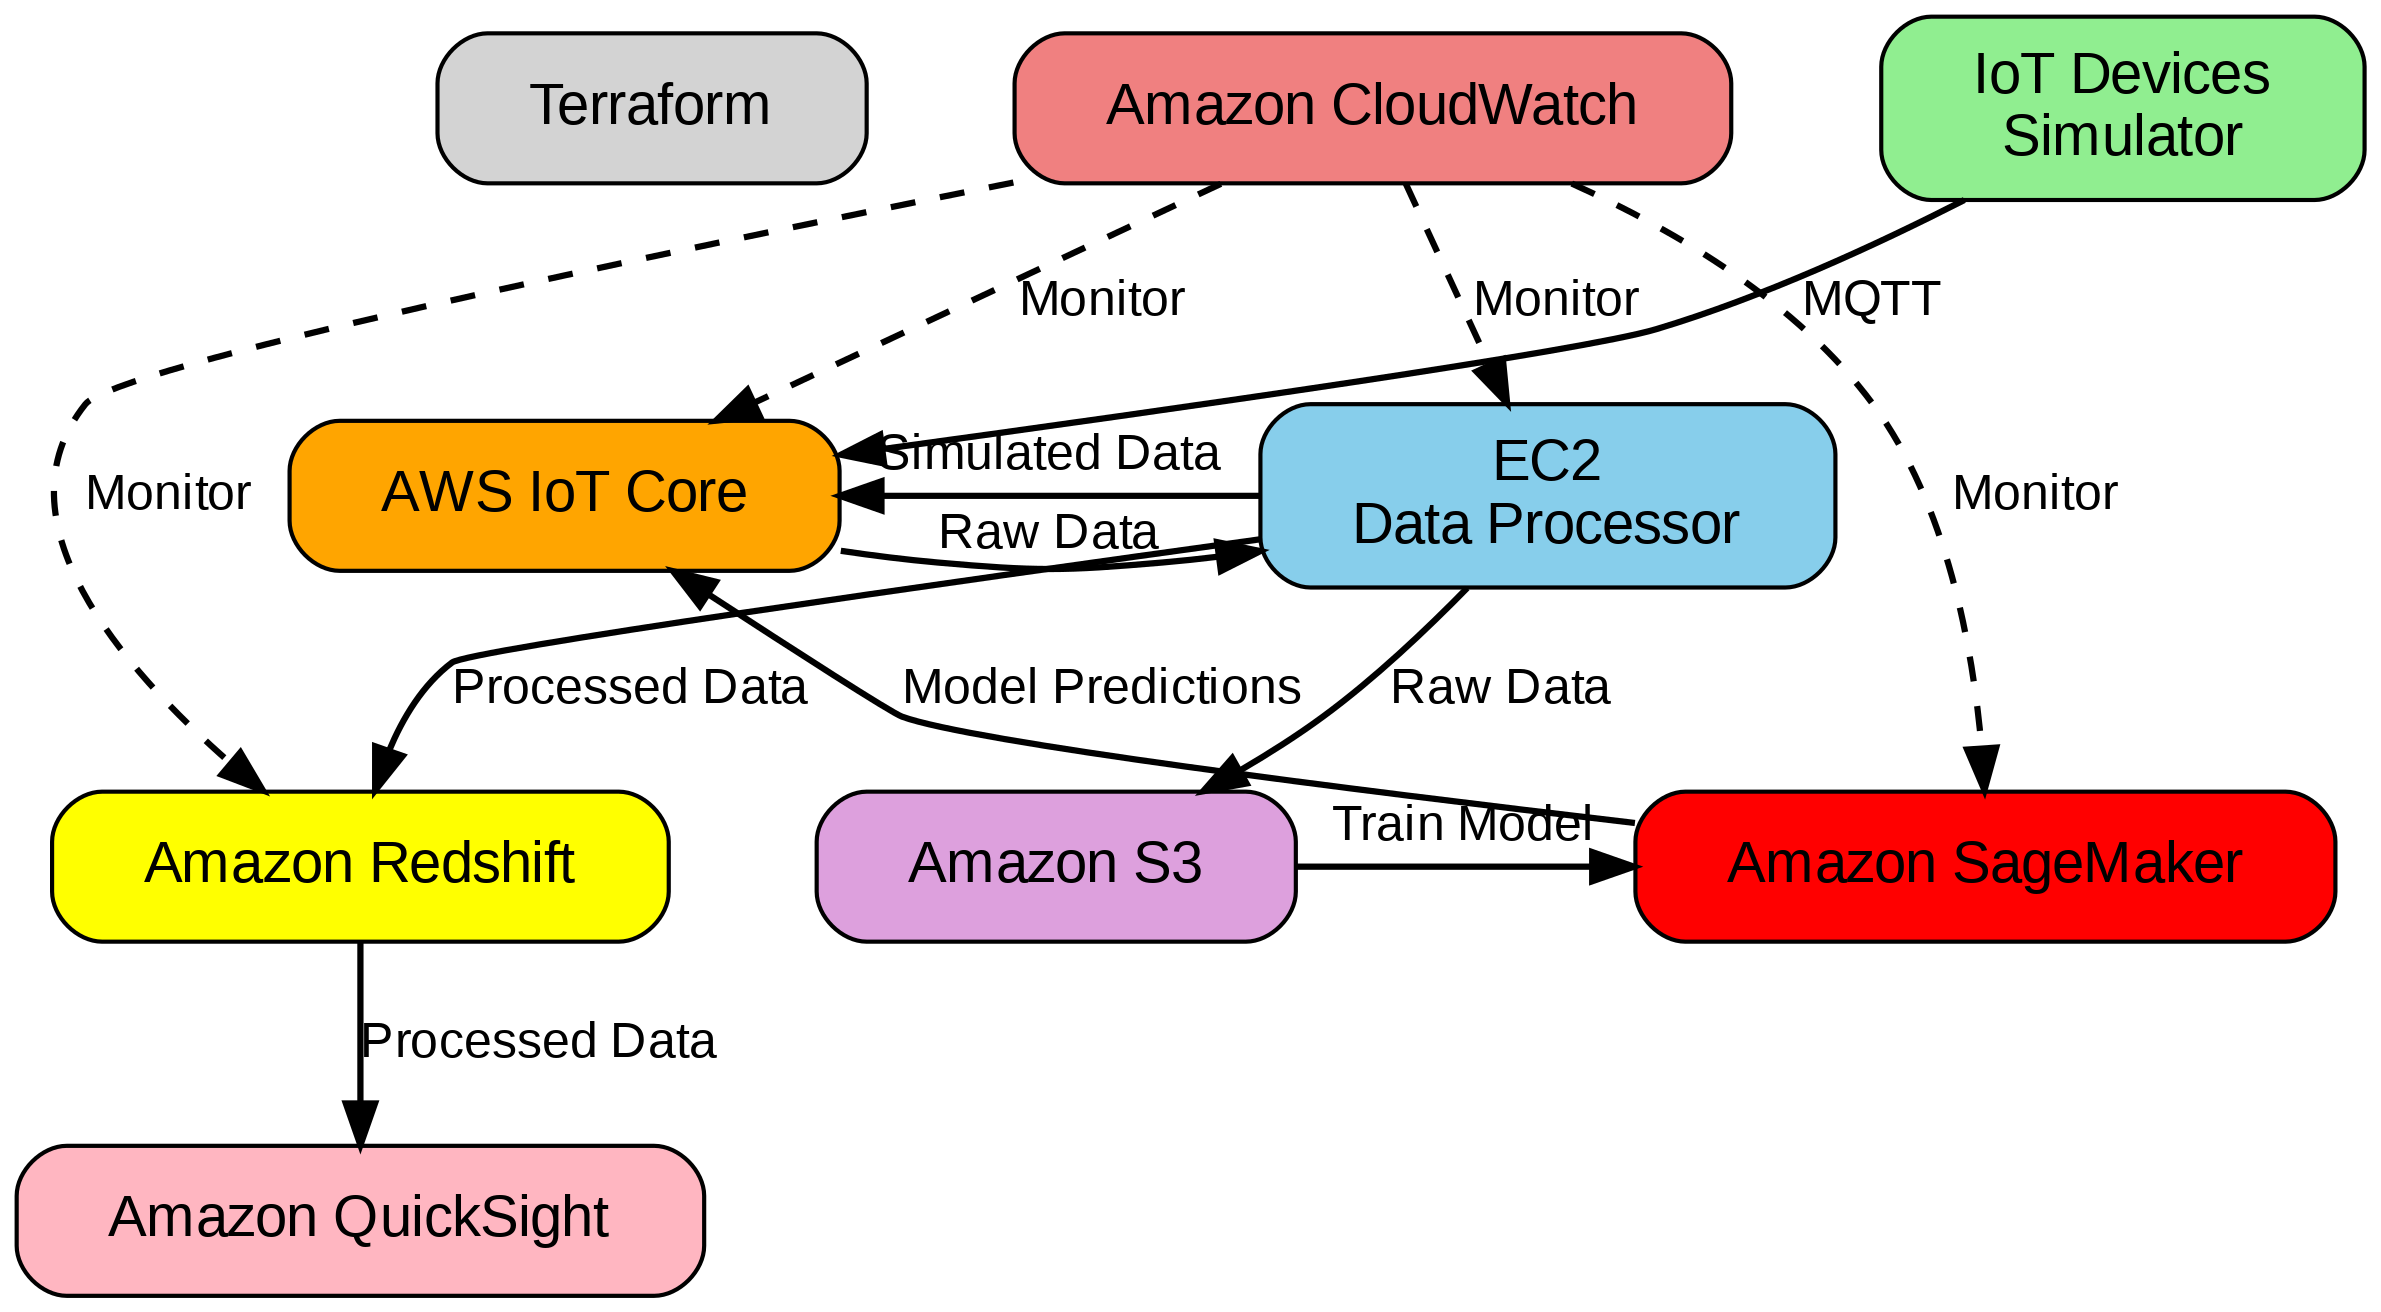

In [11]:
!pip install graphviz

from graphviz import Digraph

# Create a new directed graph
dot = Digraph(comment='Digital Twin for Li-ion Batteries', engine='dot')
dot.attr(rankdir='TB', size='12,10', dpi='300', fontname='Helvetica', fontsize='16')
dot.attr('node', shape='box', style='filled,rounded', fontname='Helvetica', fontsize='14', margin='0.3,0.1')
dot.attr('edge', fontname='Helvetica', fontsize='12', penwidth='1.5')

# Define custom colors
colors = {
    'terraform': '#D3D3D3',
    'iot': '#90EE90',
    'cloudwatch': '#F08080',
    'iot_core': '#FFA500',
    'ec2': '#87CEEB',
    'redshift': '#FFFF00',
    's3': '#DDA0DD',
    'sagemaker': '#FF0000',
    'quicksight': '#FFB6C1'
}

# Create nodes
dot.node('terraform', 'Terraform', fillcolor=colors['terraform'])
dot.node('iot_sim', 'IoT Devices\nSimulator', fillcolor=colors['iot'])
dot.node('cloudwatch', 'Amazon CloudWatch', fillcolor=colors['cloudwatch'])
dot.node('iot_core', 'AWS IoT Core', fillcolor=colors['iot_core'])
dot.node('ec2', 'EC2\nData Processor', fillcolor=colors['ec2'])
dot.node('redshift', 'Amazon Redshift', fillcolor=colors['redshift'])
dot.node('s3', 'Amazon S3', fillcolor=colors['s3'])
dot.node('sagemaker', 'Amazon SageMaker', fillcolor=colors['sagemaker'])
dot.node('quicksight', 'Amazon QuickSight', fillcolor=colors['quicksight'])

# Create edges
dot.edge('iot_sim', 'iot_core', 'MQTT')
dot.edge('cloudwatch', 'iot_core', 'Monitor', style='dashed')
dot.edge('cloudwatch', 'ec2', 'Monitor', style='dashed')
dot.edge('cloudwatch', 'redshift', 'Monitor', style='dashed')
dot.edge('cloudwatch', 'sagemaker', 'Monitor', style='dashed')
dot.edge('ec2', 'iot_core', 'Simulated Data')
dot.edge('iot_core', 'ec2', 'Raw Data')
dot.edge('ec2', 's3', 'Raw Data')
dot.edge('ec2', 'redshift', 'Processed Data')
dot.edge('s3', 'sagemaker', 'Train Model')
dot.edge('sagemaker', 'iot_core', 'Model Predictions')
dot.edge('redshift', 'quicksight', 'Processed Data')

# Adjust node positions
with dot.subgraph() as s:
    s.attr(rank='same')
    s.node('terraform')
    s.node('cloudwatch')
    s.node('iot_sim')

with dot.subgraph() as s:
    s.attr(rank='same')
    s.node('iot_core')
    s.node('ec2')

with dot.subgraph() as s:
    s.attr(rank='same')
    s.node('redshift')
    s.node('s3')
    s.node('sagemaker')

# Add invisible edges to improve layout
dot.edge('terraform', 'cloudwatch', style='invis')
dot.edge('cloudwatch', 'iot_sim', style='invis')
dot.edge('iot_core', 'ec2', style='invis')
dot.edge('redshift', 's3', style='invis')
dot.edge('s3', 'sagemaker', style='invis')

# Render the graph
dot.render('/tmp/digital_twin_architecture', view=True, format='png')

# Display the image in Colab
from IPython.display import Image
Image('/tmp/digital_twin_architecture.png')